In this project, I am going to uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [1]:
library(ggplot2)
library(readr)
library(survival)
library(dplyr)
options(warn=-1)

Warning message:
"package 'readr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Load the data

In [2]:
data=read.csv("E:/DataArtist/THC/PeopleAnalytic/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data$event=with(data,ifelse(Attrition=="Yes",1,0))
time=data$YearsAtCompany
event=data$event
group=data$Gender
survival=Surv(time,event)

## Suvival Analysis Modeling

Call: survfit(formula = Surv(time, event) ~ 1)

         n     events     *rmean *se(rmean)     median    0.95LCL    0.95UCL 
   1470.00     237.00      28.54       0.94      40.00      32.00         NA 
    * restricted mean with upper limit =  40 


Call: survfit(formula = Surv(time, event) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0   1470      16    0.989 0.00271        0.984        0.994
    1   1426      59    0.948 0.00583        0.937        0.960
    2   1255      27    0.928 0.00690        0.914        0.941
    3   1128      20    0.911 0.00769        0.896        0.927
    4   1000      19    0.894 0.00851        0.877        0.911
    5    890      21    0.873 0.00947        0.855        0.892
    6    694       9    0.862 0.01007        0.842        0.882
    7    618      11    0.846 0.01091        0.825        0.868
    8    528       9    0.832 0.01173        0.809        0.855
    9    448       8    0.817 0.01264        0.793        0.842
   10    366      18    0.777 0.01516        0.748        0.807
   11    246       2    0.770 0.01568        0.740        0.802
   13    200       2    0.763 0.01644        0.731        0.796
   14    176       2    0.754 0.01736        0.721      

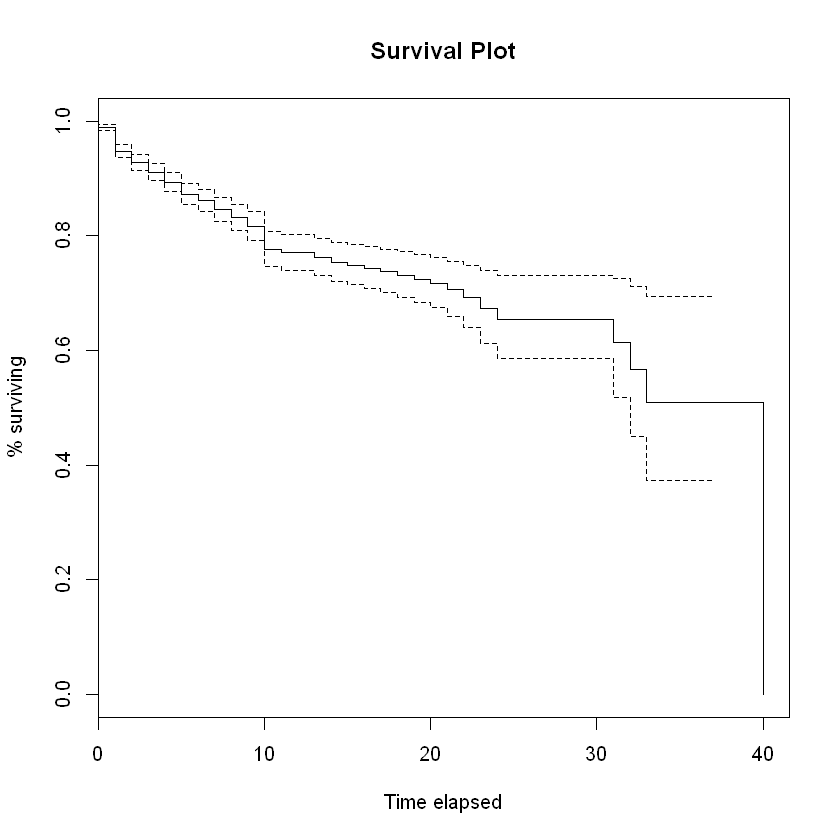

In [4]:
model=survfit(Surv(time,event)~1)
print(model,print.rmean=TRUE)
summary(model)
plot(model, xlab="Time elapsed", ylab="% surviving",main="Survival Plot")

## Survival Analysis Between Male and Feamle

Call: survfit(formula = Surv(time, event) ~ group)

                group=Female 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0    588       4    0.993 0.00339        0.987        1.000
    1    573      21    0.957 0.00845        0.940        0.974
    2    509      10    0.938 0.01016        0.918        0.958
    3    465       7    0.924 0.01133        0.902        0.946
    4    409       5    0.913 0.01226        0.889        0.937
    5    374       9    0.891 0.01398        0.864        0.918
    6    287       3    0.881 0.01483        0.853        0.911
    7    258       5    0.864 0.01639        0.833        0.897
    8    222       4    0.849 0.01785        0.814        0.884
    9    185       4    0.830 0.01968        0.793        0.870
   10    149       6    0.797 0.02314        0.753        0.844
   11    113       1    0.790 0.02399        0.744        0.838
   13     92       1    0.781 0.02522        0.733        0.832
   15     72       1  



Median values for the survival function by group are:


group=Female   group=Male 
          32           NA

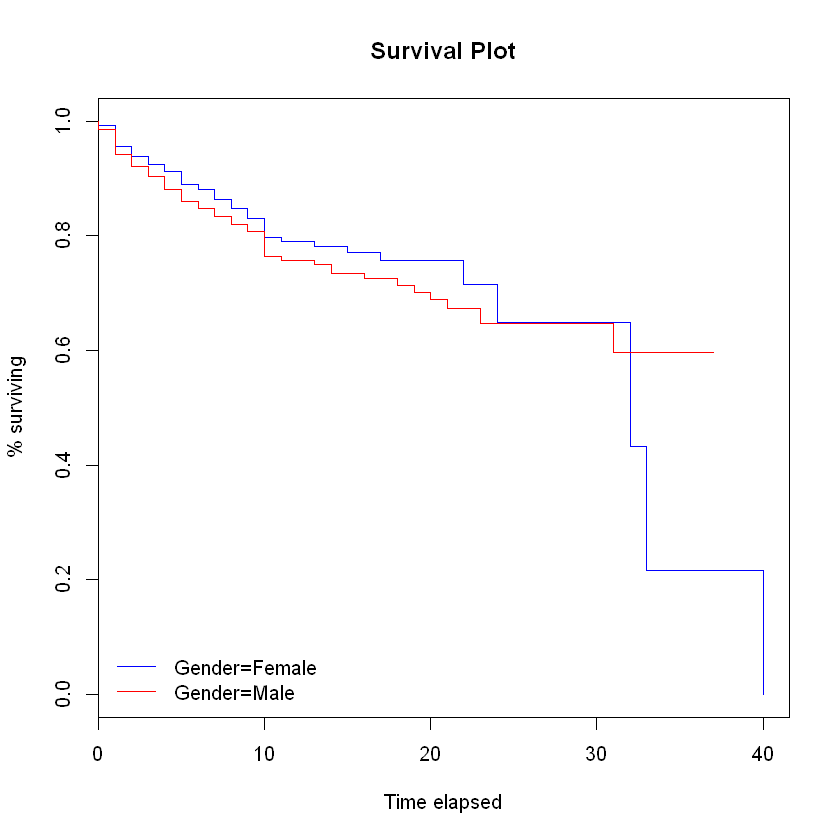

In [5]:
model_comp<- survfit(Surv(time,event) ~ group)
summary(model_comp)

cat("\n\nMedian values for the survival function by group are:\n")
summary(model_comp)$table[,'median']


plot(model_comp, xlab="Time elapsed", ylab="% surviving",main="Survival Plot", legend=T, col=c('blue','red'))
legend('bottomleft', c("Gender=Female", "Gender=Male"), col=c('blue','red'), lty = 1, bty="n")